In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

# Part 1

In [29]:
logins = pd.read_json('logins.json')

In [30]:
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [31]:
logins.describe(datetime_is_numeric = True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [32]:
logins['login'] = 1

In [33]:
logins = logins.set_index('login_time')

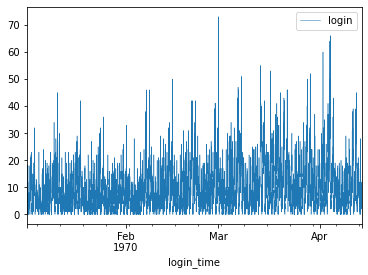

In [40]:
logins.resample('15T').sum().plot(linewidth = .5)

Saturday, January, 24, 1970


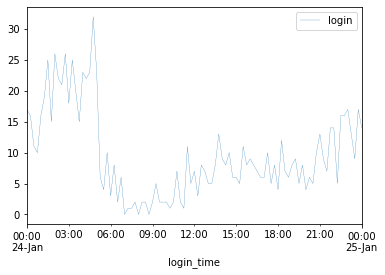

In [87]:
start = datetime.datetime.strptime('01/24/1970 00','%m/%d/%Y %H')
end = datetime.datetime.strptime('01/25/1970 00','%m/%d/%Y %H')

print(start.strftime("%A, %B, %d, %Y"))

fifteen_min = logins.resample('15T').sum()
fifteen_min.loc[start:end, :].plot(linewidth = .25)

Monday through Friday activity peaks around 12:00 pm and 9:00 pm. On Saturdays and Sundays activity peaks around 5:00 am.

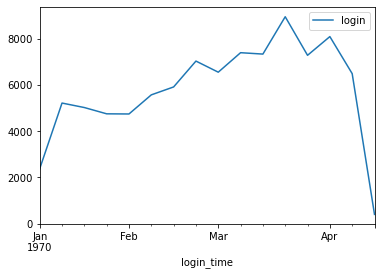

In [88]:
week = logins.resample('W').sum().plot()

log in activity increases from January to April and then sharply decreases

In [95]:
weekday

,login
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459
...,...
1970-04-09,818
1970-04-10,1009
1970-04-11,1352


In [92]:
weekdays = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday' }

In [103]:
weekday = logins.resample('d').sum().reset_index()
weekday['login_time'] = weekday['login_time'].apply(lambda date: date.weekday())
weekday = weekday.groupby('login_time').sum().reset_index()
weekday['login_time'] = weekday['login_time'].apply(lambda i: weekdays[i])

In [107]:
weekday = weekday.set_index('login_time')

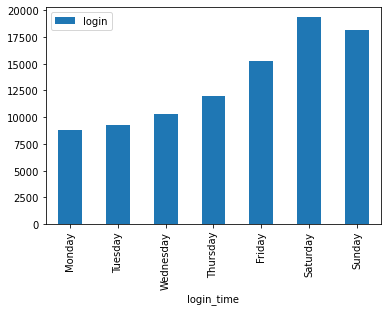

In [108]:
weekday.plot(kind = 'bar')

The most popular day is Saturday

# Part 2 

1.	The change in drives completed by drivers that have partners in the neighboring city would be the best metric of the programs success. The metric encapsulates volume of trips caused by the program which is likely the programs goal. Measuring by number of drivers with partners in different cities or measuring by the total number of reimbursements wouldn’t account for the value that a single driver who makes fifteen trips versus a driver that makes only one. However, those other metrics might be useful to measure participation and cost effectiveness.
 
2.	Given that this phenomenon is only occurring between two cities, I would implement the program for a certain amount of time (1 to 6 months) and compare the changes to the previous time period. A paired t test could then be used to see whether the changes are statistically significant. A time series analysis could also be used to see if changes after the project implementation deviate from forecasts. A statistically significant increase in amount of drivers with partners in the neighbor city would indicate the experiments success. However, it is important to note that an increasing the number of these cross city relationships doesn’t necessarily mean an increase in profit. The toll costs would have to be measured against the revenue brought in by the policy change before determining whether it should be permanently implemented. 


# Part 3

In [176]:
data = pd.read_json('ultimate_data_challenge.json')

In [177]:
data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [178]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


A few hypotheses:

Trips in first 30 days will be an indicator of who continues to using the program.

Type of phone could have an effect is there is a different with user experience on either platform.

high weekday percentage might indicate active need for service.

In [179]:
len(data)

50000

In [180]:
data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

Here I observe a lot of missing data for the 'avg_rating_of_driver'. For the cases of both 'avg_rating_of_driver' and 'avg_rating_by_driver', I can impute the median values so that I can raetaing the rest of the information in their respective rows. Deleting the rows with missing 'phone' values is a quick and minimally harmful way to handle the missing data. 

In [181]:
# imputing avg_rating_of_driver
null_mask1 = data['avg_rating_of_driver'].isnull()
impute_value1 = np.nanmedian(data['avg_rating_of_driver'])
data.loc[data[null_mask1].index, 'avg_rating_of_driver'] = impute_value1

# imputing avg_rating_by_driver
null_mask2 = data['avg_rating_by_driver'].isnull()
impute_value2 = np.nanmedian(data['avg_rating_by_driver'])
data.loc[data[null_mask2].index, 'avg_rating_by_driver'] = impute_value2

# removing all other rows with na values.
data = data.dropna(axis = 0)

data = data.reset_index()

In [182]:
# change dates to datetime objects
data['signup_date'] = pd.to_datetime(data['signup_date'], format = '%Y-%m-%d')
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'], format = '%Y-%m-%d')

In [183]:
data['active'] = 0 

active_index = data[data['last_trip_date'] >= datetime.datetime(2014, 6, 1)].index

data.loc[active_index,'active'] = 1

data['active'].value_counts()

0    30933
1    18671
Name: active, dtype: int64

In [184]:
data['active']

0        1
1        0
2        0
3        1
4        0
        ..
49599    1
49600    0
49601    0
49602    0
49603    0
Name: active, Length: 49604, dtype: int64

In [185]:
data['last_trip_date'].sort_values().head()

38503   2014-01-01
25839   2014-01-01
32993   2014-01-01
31413   2014-01-01
3753    2014-01-01
Name: last_trip_date, dtype: datetime64[ns]

(array([735234., 735265., 735293., 735324., 735354., 735385., 735415.]),
 <a list of 7 Text major ticklabel objects>)

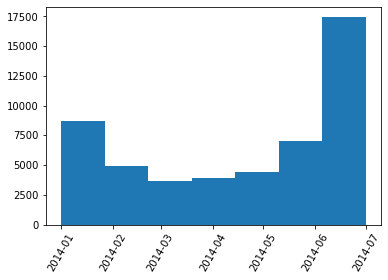

In [94]:
data['last_trip_date'].hist(bins = 7, grid = False)
plt.xticks(rotation = 60)

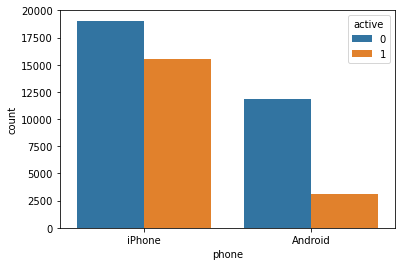

In [121]:
sns.countplot(data = data, x = 'phone',hue = 'active')

A larger ratio of iPhone users stay active compared to Android users.

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [189]:
dropping = ['index','last_trip_date', 'active', 'signup_date']
categorical = ['city', 'phone', 'ultimate_black_user']
numerical = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

Dropping last_trip_date and active because these variables have direct information on what the model is learning to predict. I believe that signup_date has no useful information as all of the dates exist within January and it will only make the data messier.

Categorical variables will be turned into dummies and numerical variables will be scaled. 

In [193]:
X = data.drop(dropping, axis =1)

X = pd.get_dummies(X, columns = categorical)

y = data['active']

In [192]:
y

0        1
1        0
2        0
3        1
4        0
        ..
49599    1
49600    0
49601    0
49602    0
49603    0
Name: active, Length: 49604, dtype: int64

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 4)

In [195]:
X_train[numerical]

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
40825,0,4.3,1.00,0.0,100.0,1.46,5.0
28099,5,4.5,1.16,12.5,75.0,9.99,5.0
9991,1,5.0,1.00,0.0,100.0,21.17,5.0
38911,0,4.2,1.00,0.0,52.6,5.76,4.5
11420,1,3.0,1.00,0.0,100.0,13.22,5.0
...,...,...,...,...,...,...,...
23346,0,5.0,1.00,0.0,66.7,13.90,5.0
11863,1,5.0,1.00,0.0,100.0,0.49,5.0
27063,0,5.0,1.00,0.0,0.0,14.97,5.0
8366,2,5.0,1.00,0.0,50.0,2.42,5.0


In [218]:
numeric = X_train[numerical]
Scaler = MinMaxScaler()
Scaler.fit(numeric)

X_train.loc[:,numerical] = Scaler.transform(X_train[numerical])
X_test.loc[:,numerical] = Scaler.transform(X_test[numerical])

C:\Users\Allen\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\Allen\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [199]:
X_train

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
40825,0.000,0.825,0.000000,0.000,1.000,0.009071,1.000,0,1,0,0,1,0,1
28099,0.040,0.875,0.022857,0.125,0.750,0.062065,1.000,0,0,1,0,1,0,1
9991,0.008,1.000,0.000000,0.000,1.000,0.131523,1.000,0,0,1,0,1,1,0
38911,0.000,0.800,0.000000,0.000,0.526,0.035785,0.875,0,0,1,0,1,1,0
11420,0.008,0.500,0.000000,0.000,1.000,0.082132,1.000,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23346,0.000,1.000,0.000000,0.000,0.667,0.086357,1.000,0,0,1,1,0,0,1
11863,0.008,1.000,0.000000,0.000,1.000,0.003044,1.000,1,0,0,1,0,0,1
27063,0.000,1.000,0.000000,0.000,0.000,0.093004,1.000,0,1,0,0,1,0,1
8366,0.016,1.000,0.000000,0.000,0.500,0.015035,1.000,0,0,1,0,1,0,1


With the data prepared for modeling I will train a Logistic Regression in order to model whether or not a user is active.

In [202]:
from sklearn.metrics import classification_report, plot_roc_curve, auc, precision_recall_curve, plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      6144
           1       0.60      0.66      0.63      3777

    accuracy                           0.70      9921
   macro avg       0.69      0.69      0.69      9921
weighted avg       0.71      0.70      0.71      9921



C:\Users\Allen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

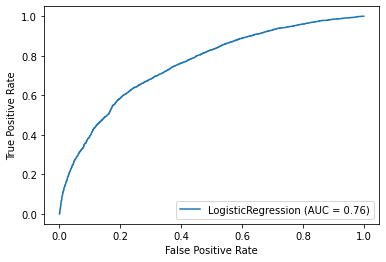

<Figure size 432x288 with 0 Axes>

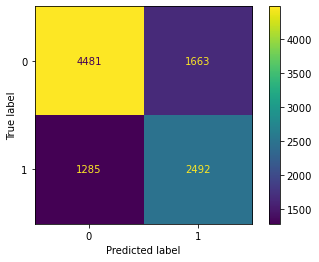

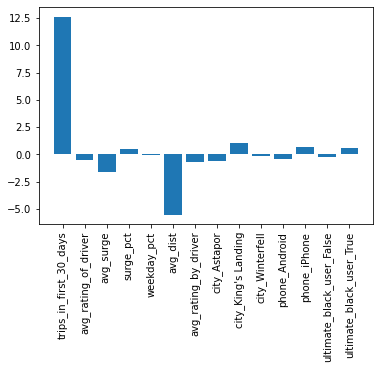

In [215]:
Lr_model = LogisticRegression(class_weight = 'balanced')
Lr_model.fit(X_train, y_train)

y_pred = Lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure()
plot_roc_curve(Lr_model, X_test, y_test)

plt.figure()
plot_confusion_matrix(Lr_model, X_test, y_test)

plt.figure()
feature_importances = {}
for feature, importance in zip(list(X_train.columns), Lr_model.coef_.tolist()[0]):
                               feature_importances[feature] = importance

plt.bar(feature_importances.keys(), feature_importances.values())
plt.xticks(rotation = 90)

Trips in_first_30_days and avg_dist were the most important features using this regression. This makes sense but it doesn't give any more insights outside the context of make sure people like the product when they use it. Therefore I run a new regression to see how the model can perform without those columns.

In [212]:
X_train2 = X_train.drop(['trips_in_first_30_days', 'avg_dist'], axis = 1)
X_test2 = X_test.drop(['trips_in_first_30_days', 'avg_dist'], axis = 1)

              precision    recall  f1-score   support

           0       0.75      0.70      0.73      6144
           1       0.56      0.63      0.59      3777

    accuracy                           0.67      9921
   macro avg       0.66      0.66      0.66      9921
weighted avg       0.68      0.67      0.68      9921



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

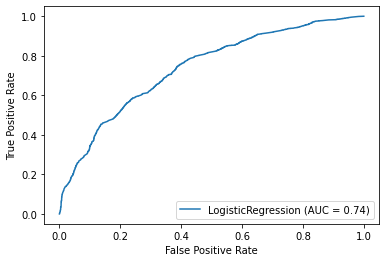

<Figure size 432x288 with 0 Axes>

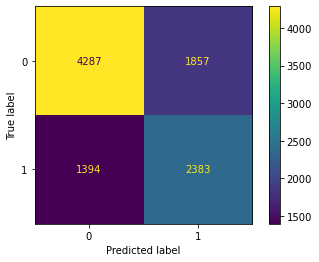

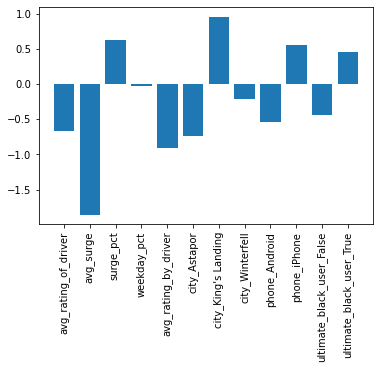

In [214]:
Lr_model = LogisticRegression(class_weight = 'balanced')
Lr_model.fit(X_train2, y_train)

y_pred = Lr_model.predict(X_test2)
print(classification_report(y_test, y_pred))

plt.figure()
plot_roc_curve(Lr_model, X_test2, y_test)

plt.figure()
plot_confusion_matrix(Lr_model, X_test2, y_test)

plt.figure()

feature_importances = {}
for feature, importance in zip(list(X_train2.columns), Lr_model.coef_.tolist()[0]):
                               feature_importances[feature] = importance

plt.bar(feature_importances.keys(), feature_importances.values())
plt.xticks(rotation = 90)

While the new model doesn't perform quite as well as the last one, the feature importances have more actionable implications. The features with the largest magnitudes are avg_surge and city_King's Landing. The large negative value of avg_surge indicates that the surge prices decrease the probability that a user will keep using the ride service. This makes because more surges lead to higher costs which makes the service less competitive. Increasing riders to reduce the avg_surge would make the ride service more competitive. There also might be an opportunity for research with regards to the cities and which aspects cause them to affect activity. It is possible that city location is simply a proxy for surge cost if the cities have different numbers of available drivers. The difference between iPhone and Android users also indicates that there might be a significant difference in user experience on those platforms. 